# INTRODUCTION

The mental health in students irrespective of level and course of study is of utmost importance. According to the World Health Organization, Mental health is a vital aspect of overall well-being, enabling individuals to cope with life's stresses, develop their abilities, learn, work, and contribute to their community. It is an integral component of health and well-being. The Analysis of student mental health take in account factors that could contribute to student mental health.

# OBJECTIVES

The objectives of the Analysis is to investigate student mental health and explore factors that contribute to Student have mental health issue.

# DATASET

The dataset for this analysis was obtained from https://www.kaggle.com/datasets.

# Outline

1. Data Collection
2. Data Cleaning and Tranformation
3. Data Analysis
4. Result Interpretation
5. Conclusion

**Importing of Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading of the Dataset**

In [2]:
# Import the modules
from data_loader import load_data

data = load_data()

Data loaded successfully!


**Checking the information of the dataset**

In [3]:
data.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [4]:
data.tail(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
98,13/07/2020 21:22,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
data.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
data.shape

(101, 11)

In [8]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


From the descriptive table above, the statistics shows that the Mean Age of the students in the dataset is around 20.53 years. The age values are dispersed by approximately 2.49628 years. Minimum and Maximum Ages is 18 and 24 respectively. In addition, 25% of the students are 18 years old or younger. 50% of the students are 19 years old while, 75% of the individuals are 23 years old. 

In [9]:
data.duplicated().sum()

0

**Copy of data is made. This is to sure that any changes or modifications done during processing or analysis will not affect the original dataset, hence dataset is duplicated. This helps to preserve the accuracy of your data.**

In [10]:
cdata = data.copy()

**Data Cleaning and Tranformation**

* Renaming of column labels for easy identification and manipulation.
* Handling missing values
* Cast type variables in there correct format
* Correctly formatting  columns and remove whitespace
* Renaming of variables for readability

In [11]:
cdata.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

Renaming of column labels for easy identification and manipulation

In [12]:
cdata.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

In [13]:
cdata

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [14]:
cdata['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

There are some discrepancies with the year of study resulting in similarity in the unique value. Replace method will be applied to correct this discrepancies.

In [15]:
cdata['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [16]:
cdata['Year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [17]:
cdata['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

There are some discrepancies with the course. That is samen course is having different name. Replace method will be use to correct this discrepancies.

In [18]:
cdata['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'KOE','Koe': 'KOE', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'BENL': 'Benl', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law', 'Econs': 'Economics'} , inplace = True)


In [19]:
cdata['Course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical science', 'Benl', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology',
       'Communication ', 'Diploma Nursing', 'Pendidikan Islam ',
       'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing '], dtype=object)

In [20]:
cdata['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

There are white spaces that need to remove so that the range of CGPA will be accurate. The strip() method will be applied.  

In [21]:
cdata['CGPA'] = cdata['CGPA'].str.strip()

In [22]:
cdata['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

There is a missing value in the Age column. Refer to data.info(). 

In [23]:
median_age = cdata['Age'].median()
median_age 

19.0

In [24]:
cdata['Age'] = cdata['Age'].fillna(median_age)

Type casting the Age and TimeStamp columns to integer type and datatime using the astype()

In [25]:
cdata['Age'] = cdata['Age'].astype(int)

In [26]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       101 non-null    object
 1   Gender          101 non-null    object
 2   Age             101 non-null    int32 
 3   Course          101 non-null    object
 4   Year of Study   101 non-null    object
 5   CGPA            101 non-null    object
 6   Marital status  101 non-null    object
 7   Depression      101 non-null    object
 8   Anxiety         101 non-null    object
 9   Panic attack    101 non-null    object
 10  Treatment       101 non-null    object
dtypes: int32(1), object(10)
memory usage: 8.4+ KB


In [27]:
cdata['Depression'].unique()

array(['Yes', 'No'], dtype=object)

The target variable in the data is the depression-related column. For this reason, renaming it is essential in order to improve readability and enable visualization.Other columns with yes and no response will be rename also. 

In [28]:
cdata['Depression'] = cdata['Depression'].replace({'Yes': 'Depressed', 'No': 'Not depressed'})

In [29]:
cdata['Depression'].unique()

array(['Depressed', 'Not depressed'], dtype=object)

In [30]:
cdata.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

In [31]:
cdata['Panic attack'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
cdata['Panic attack'] = cdata['Panic attack'].replace({'Yes': 'Panic attack', 'No': 'No panic_attack'})

In [33]:
cdata['Panic attack'].unique()

array(['Panic attack', 'No panic_attack'], dtype=object)

In [34]:
cdata['Anxiety'] = cdata['Anxiety'].replace({'Yes': 'Anxiety_present', 'No': 'No_anxiety'})

In [35]:
cdata['Anxiety'].unique()

array(['No_anxiety', 'Anxiety_present'], dtype=object)

In [36]:
cdata['Treatment'] = cdata['Treatment'].replace({'Yes': 'Treatment', 'No': 'No_treatment'})

In [37]:
cdata['Treatment'].unique()

array(['No_treatment', 'Treatment'], dtype=object)

In [38]:
cdata['Marital status'] = cdata['Marital status'].replace({'Yes': 'Married', 'No': 'Not_married'})

In [39]:
cdata

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,08/07/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment
1,08/07/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
2,08/07/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
3,08/07/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment
4,08/07/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56,Female,21,BCS,year 1,3.50 - 4.00,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
97,13/07/2020 21:21,Male,18,Engineering,year 2,3.00 - 3.49,Not_married,Depressed,Anxiety_present,No panic_attack,No_treatment
98,13/07/2020 21:22,Female,19,Nursing,year 3,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment
99,13/07/2020 21:23,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment


**DATA EXPLORATION**

In this section variables are explore in order to understand the distribution of variables, the range and variability of the data.

In [40]:
cdata.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

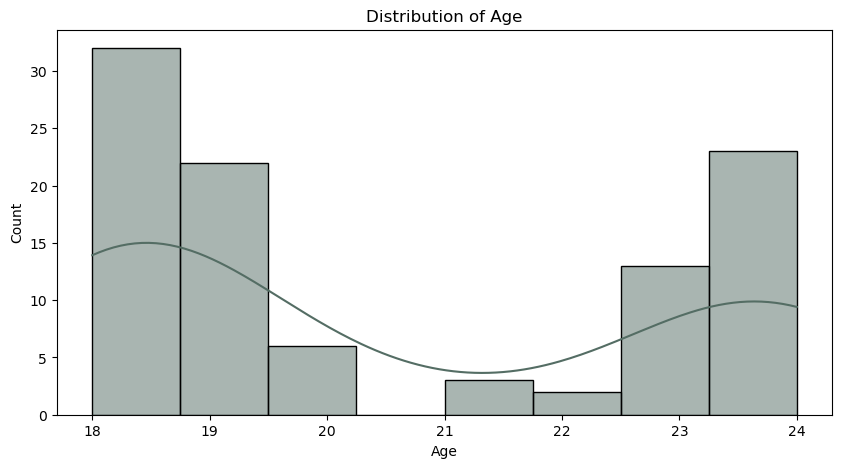

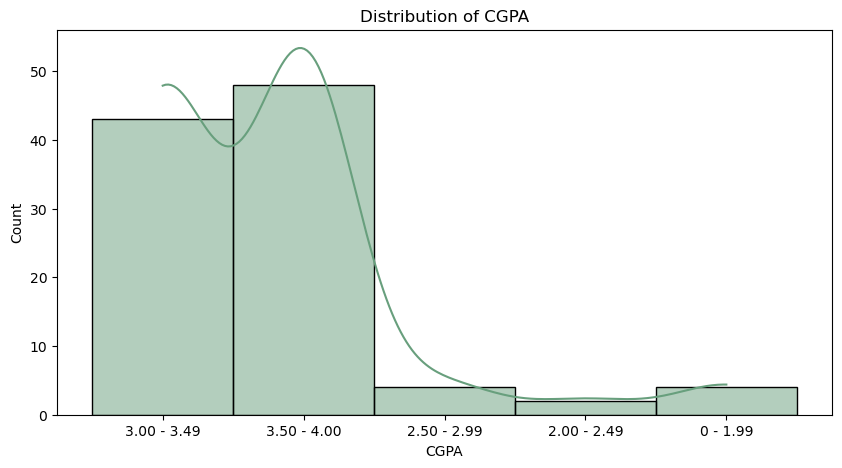

In [41]:
numerical_variables = ['Age', 'CGPA']
colors = ['#546D64', '#689F7D']

for column, color in zip(numerical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=cdata, x = column, kde=True, color = color)
    plt.title(f'Distribution of {column}')
    plt.show()
    
    

Majority of the students fall in the age range 18-19 and 23-24.This distribution account for the fact that most of the students are in the first year. 
Most of the students have excellent performance, reasons why the majority of students fall in the CGPA ranges of 3.0 - 3.49 and 3.5 - 4.00.

In [42]:
cdata['Depression'].value_counts()

Depression
Not depressed    66
Depressed        35
Name: count, dtype: int64

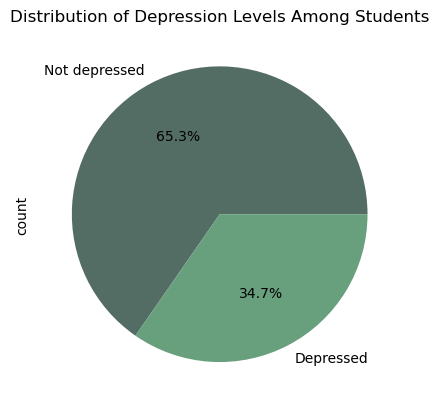

In [43]:
cdata['Depression'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#546D64','#689F7D'])
plt.title('Distribution of Depression Levels Among Students')
plt.show()

From the total number of students in the data 34.7% account for students that are depressed, although the rate is below 50%  this is rate is a  call for concern given that mental deals with the overall wellbeing of the students. 

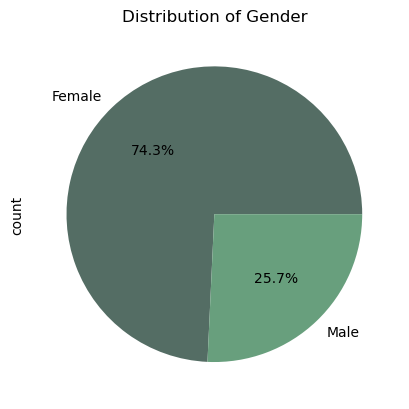

In [44]:
cdata['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#546D64','#689F7D'])
plt.title('Distribution of Gender')
plt.show()

74.3% of the student population is made up of female which shows that there are more female in the data compare to 25.7% of male.

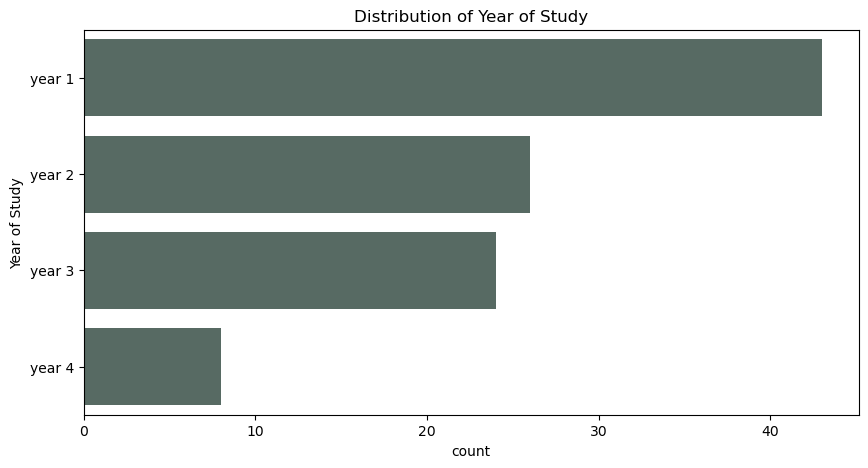

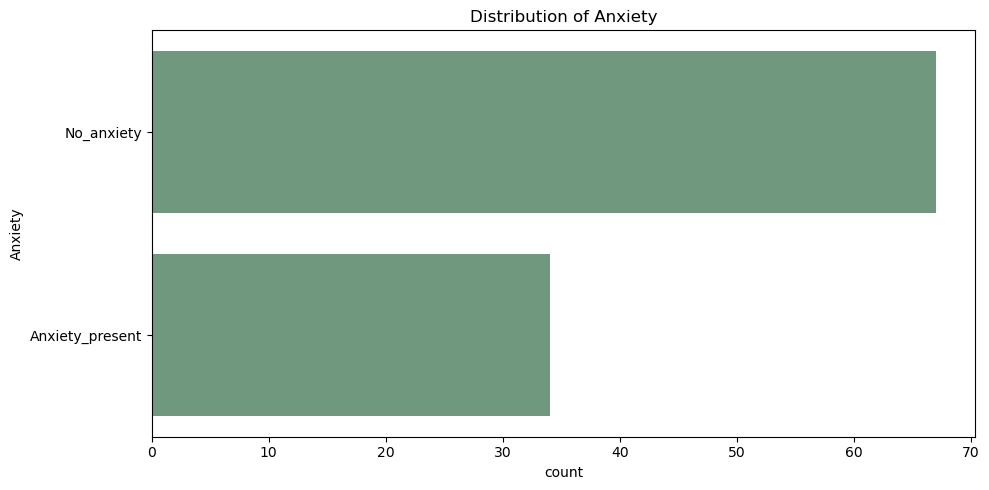

In [45]:
categorical_variables = [ 'Year of Study', 'Anxiety']
colors = ['#546D64', '#689F7D']

for column, color in zip(categorical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=cdata, y=column, color=color)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Majority of the students are in the first year. this could be one of the reasons why the dominant age group is 18 and 19. For the count of students with anxiety a considerable count(30 and above) for students expiriencing anxiety and 60% and above are not experiencing anxiety. 

In [46]:
len(cdata['Course'].unique())

36

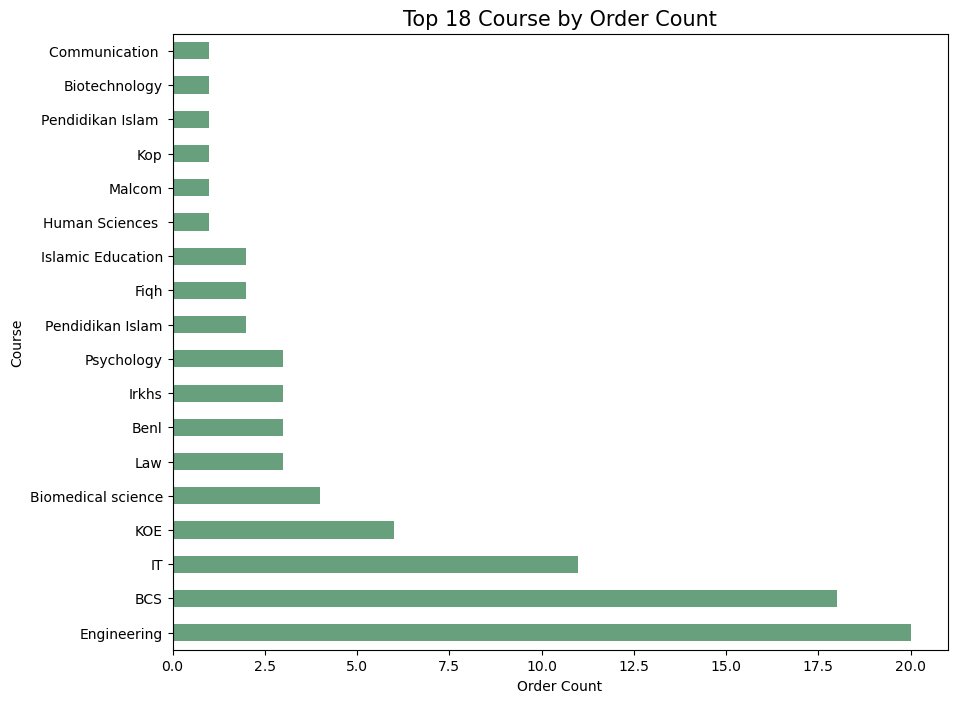

In [47]:
plt.figure(figsize=(10, 8))
cdata.Course.value_counts().iloc[:18].plot(kind='barh',color= '#689F7D' )
plt.title('Top 18 Course by Order Count', fontsize=15)
plt.xlabel('Order Count')
plt.ylabel('Course')
plt.show()

The majority of the students are enrolled engineering and BCS relative to other courses has less number of students.

Total number of IT students: 11


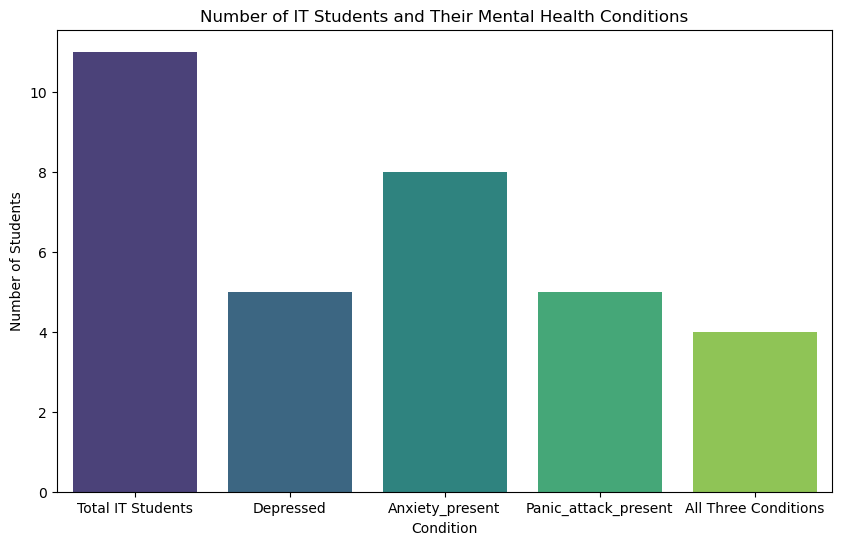

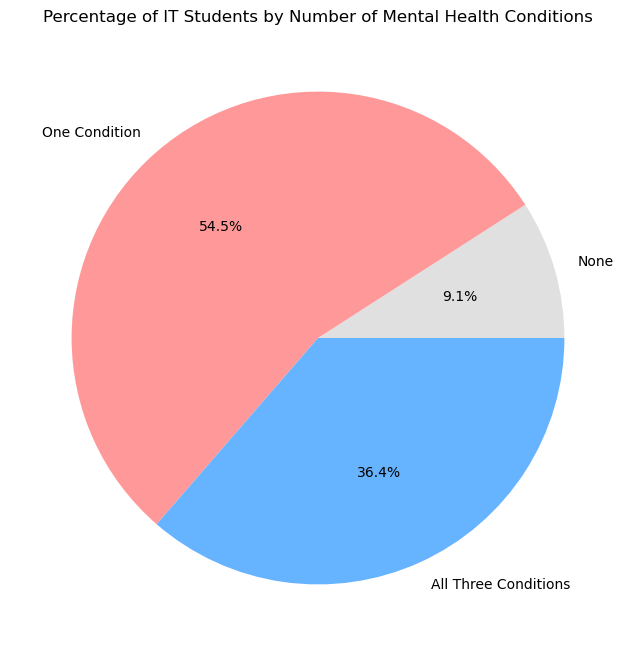


        A small percentage of IT students are free from the three studied mental health conditions. 
        Over half of the students have only one of the conditions, indicating that mental health issues are prevalent but not always multifaceted. A          
        significant portion of students (36.4%) experience all three conditions simultaneously, reflecting a serious overlap of mental health issues 
        among some students.


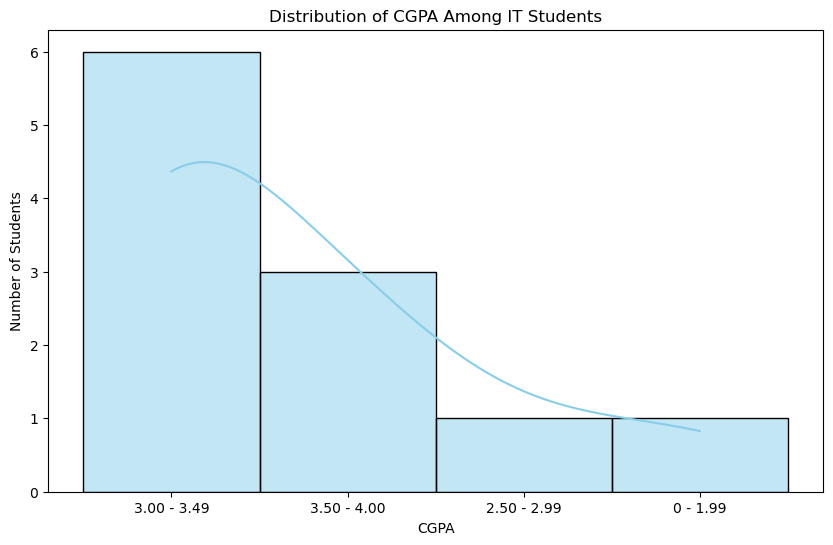

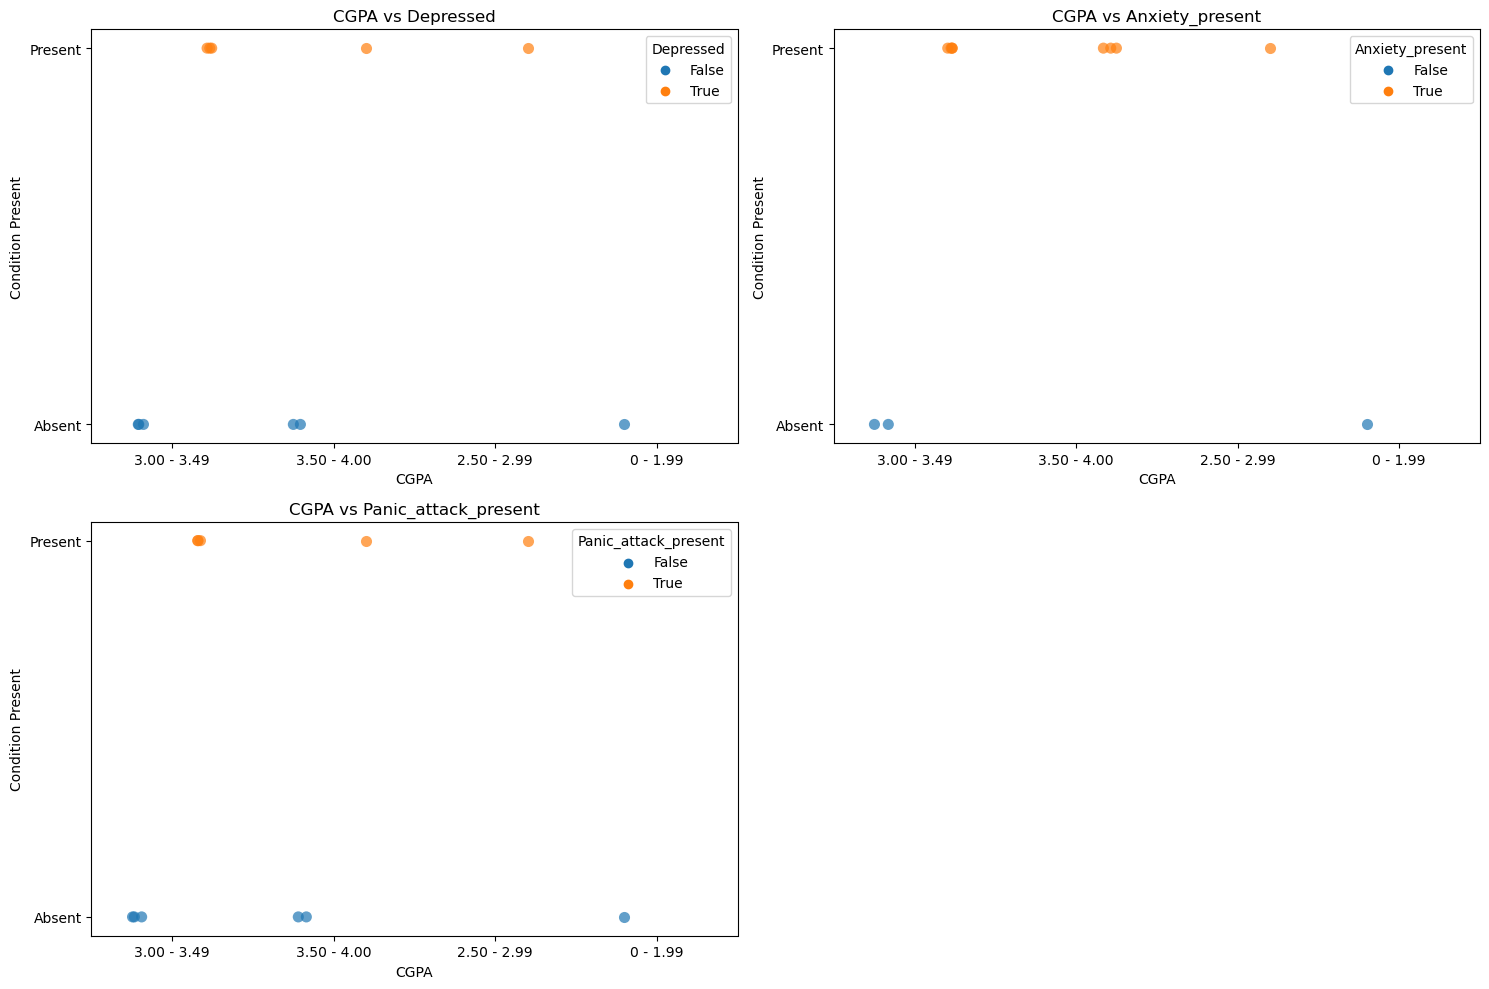

Counts of students with each condition:
Depressed: 5
Anxiety_present: 8
Panic_attack_present: 5


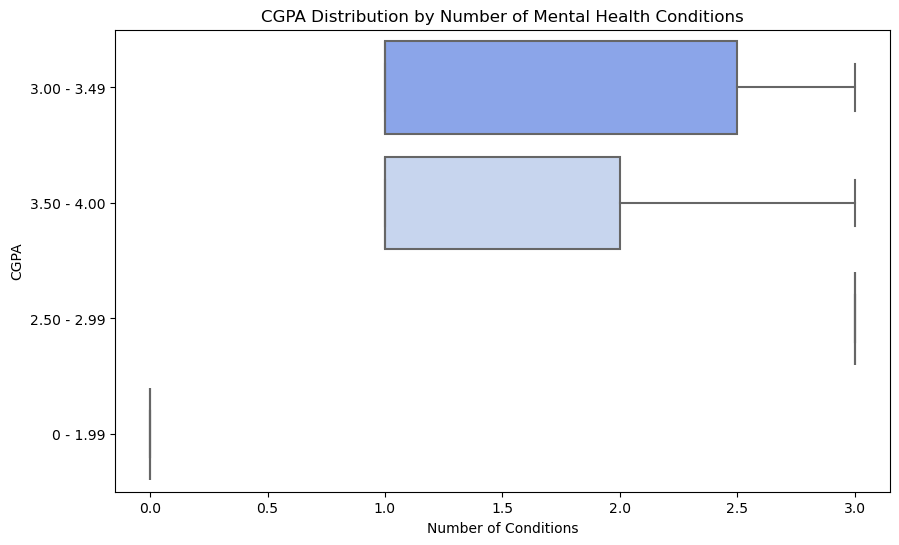

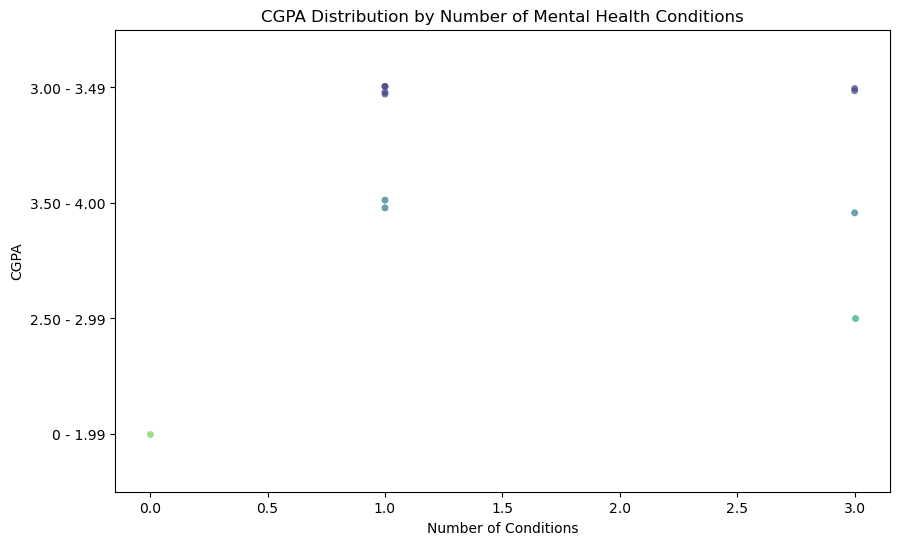

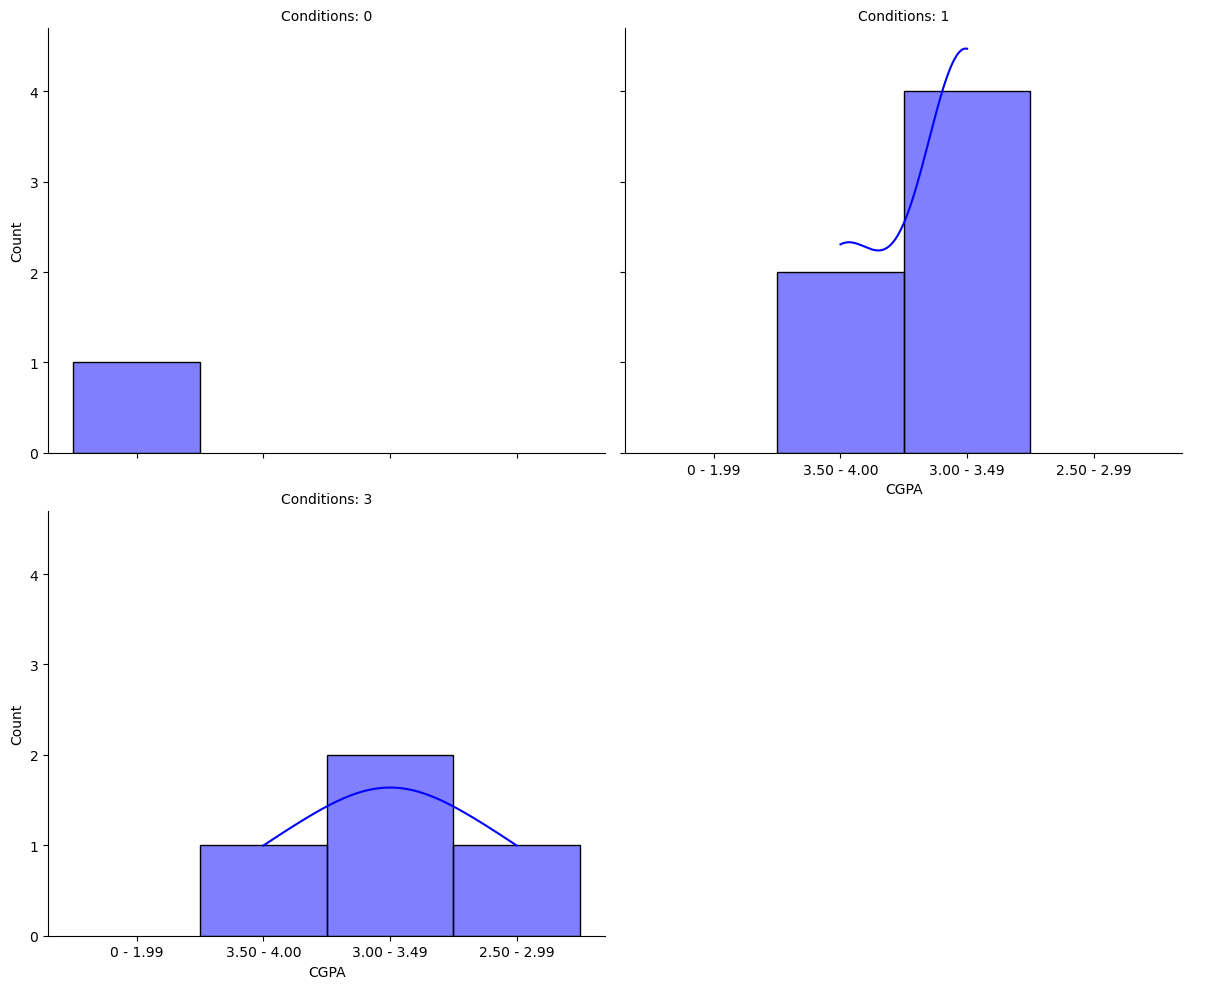


        Analysis of the data reveals that students with a CGPA of 3.00 and above tend to have a higher number 
        of mental health conditions compared to those with a CGPA below 3.00. Specifically, the percentage of students with multiple conditions is
        significantly higher in the higher CGPA group. This suggests that higher academic performance may be associated with an increased 
        prevalence of mental health issues among IT students.
        


In [48]:
from IT_Students_Analysis import ITStudentsAnalysis

# `cdata` is already loaded and cleaned in notebook
it_analysis = ITStudentsAnalysis(cdata)

# Analyze IT students
total_it_students = it_analysis.analyze_it_students()
print(f"Total number of IT students: {total_it_students}")

# Get condition counts and plot
condition_df = it_analysis.condition_counts()

# Plot and analyze condition combinations
pie_data = it_analysis.plot_condition_combinations()

# Display the analysis summary
summary_text = it_analysis.get_analysis_summary()
print(summary_text)

# Plot CGPA Distribution
it_analysis.plot_cgpa_distribution()

# Plot CGPA vs Mental Health Conditions
it_analysis.plot_cgpa_vs_conditions()

# Plot CGPA Distribution by Number of Mental Health Conditions
it_analysis.plot_cgpa_by_condition_count()

# Plot CGPA Distribution with Stripplot
it_analysis.plot_cgpa_stripplot()

# Plot CGPA Distribution by Number of Conditions using FacetGrid
it_analysis.plot_cgpa_facetgrid()

# Retrieve and display the CGPA analysis summary
cgpa_analysis_summary = it_analysis.get_cgpa_analysis_summary()
print(cgpa_analysis_summary)

**Since our analysis is to understand student mental health, a new data frame is created a new frame with only student who indicated depression since it is our target variable.**

In [49]:
cdata['Depression'].unique()

array(['Depressed', 'Not depressed'], dtype=object)

In [50]:
depression_df = cdata[cdata.Depression == 'Depressed']
depression_df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment,Depressed,Anxiety_present,Panic_attack_present
0,08/07/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment,True,False,True
2,08/07/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment,True,True,True
3,08/07/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment,True,False,False
6,08/07/2020 12:32,Female,23,Pendidikan Islam,year 2,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment,True,False,True
11,08/07/2020 12:39,Female,24,Engineering,year 3,3.50 - 4.00,Married,Depressed,No_anxiety,No panic_attack,No_treatment,True,False,False
12,08/07/2020 12:40,Female,18,BCS,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,No panic_attack,No_treatment,True,False,False
17,08/07/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Married,Depressed,Anxiety_present,Panic attack,No_treatment,True,True,True
19,08/07/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Married,Depressed,Anxiety_present,Panic attack,No_treatment,True,True,True
24,08/07/2020 13:17,Female,23,BCS,year 3,3.50 - 4.00,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment,True,True,True
27,08/07/2020 13:41,Male,18,Engineering,year 2,3.00 - 3.49,Married,Depressed,Anxiety_present,No panic_attack,No_treatment,True,True,False


In [51]:
depression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             35 non-null     object
 1   Gender                35 non-null     object
 2   Age                   35 non-null     int32 
 3   Course                35 non-null     object
 4   Year of Study         35 non-null     object
 5   CGPA                  35 non-null     object
 6   Marital status        35 non-null     object
 7   Depression            35 non-null     object
 8   Anxiety               35 non-null     object
 9   Panic attack          35 non-null     object
 10  Treatment             35 non-null     object
 11  Depressed             35 non-null     bool  
 12  Anxiety_present       35 non-null     bool  
 13  Panic_attack_present  35 non-null     bool  
dtypes: bool(3), int32(1), object(10)
memory usage: 3.2+ KB


Numbers of depressed student across gender

In [52]:
depression_df.Gender.value_counts(normalize=True)

Gender
Female    0.828571
Male      0.171429
Name: proportion, dtype: float64

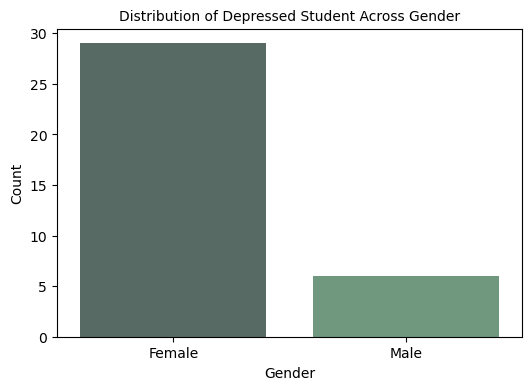

The distribution of Depressed Student Across Gender shows that more female students are depressed relative to the male students.


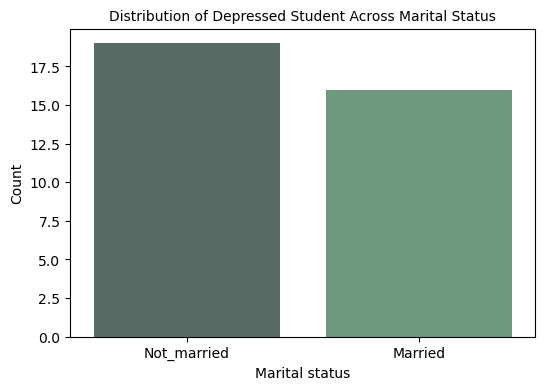

For the distribution of students across married and unmarried, we see that the number of unmarried students who are depressed is higher. This might be because married students have support from their spouse, making it easier for them to navigate life, thus leading to a lower number of married people being depressed. Alternatively, married students may have built stronger resilience due to their experiences in matrimony, making them more mentally stable than the unmarried.


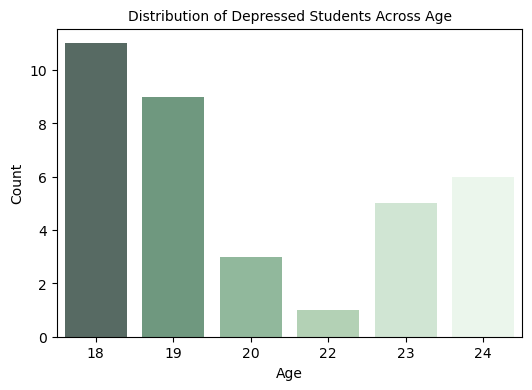

Across student age the proportion of students who are depressed falls with age 18 and 19. At 20 to 22 the proportion of depressedstudents decrease. There is also a noticeable increase in the number of depressed studnt form Age 24.


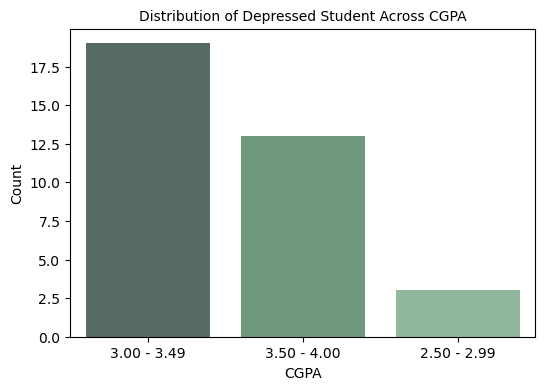

There are more depressed students with CGPA OF 3.00 - 3.49, followed by students with CGPA of 3.50 - 4.00. Only a few proportion of student with CGPA OF 2.50 - 2.99 are depressed.


In [53]:
from depression_Analysis import DepressionAnalysis

# depression_df is already defined in notebook
analysis = DepressionAnalysis(depression_df)

# Plot gender distribution
analysis.plot_gender_distribution()

# Print insight about gender distribution
print(analysis.gender_distribution_insight())

# Plot marital status distribution
analysis.plot_marital_status_distribution()

# Print insight about marital status distribution
print(analysis.marital_status_distribution_insight())

# Plot age distribution
analysis.plot_age_distribution()

# Print insight about age distribution
print(analysis.age_distribution_insight())

# Plot cgpa distribution
analysis.plot_cgpa_distribution()

# Print insight about cgpa distribution
print(analysis.cgpa_distribution_insight())

In [54]:
depression_df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment',
       'Depressed', 'Anxiety_present', 'Panic_attack_present'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

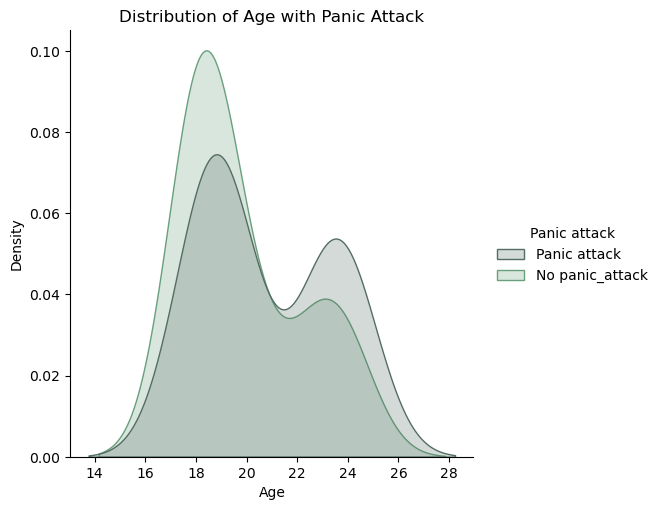

In [55]:
colors = {'Panic attack': '#546D64', 'No panic_attack': '#689F7D'}

plt.figure(figsize=(8, 5))
sns.displot(data=depression_df, x='Age', hue='Panic attack', palette=colors, kind='kde', fill=True)
plt.title('Distribution of Age with Panic Attack', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The kernel density plot indicate that there are variations in the distribution of ages between students  with panick and no panick attack. Also, students  within the age of 18 and above without panick attack are more likely to be depressed relative to student with panick attack.

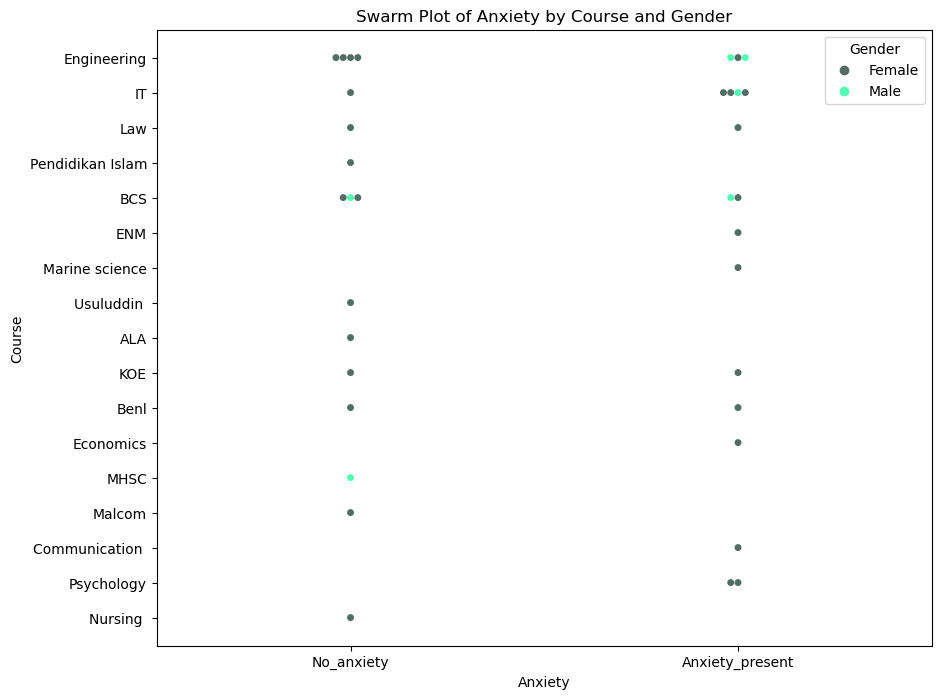

More female students enrolled in engineering with no anxiety have depression compared to male students enrolled in engineering. Female students enrolled in IT with anxiety are more likely to have depression relative to males enrolled in IT. Overall, there are variations in depression status across courses of study and anxiety levels.


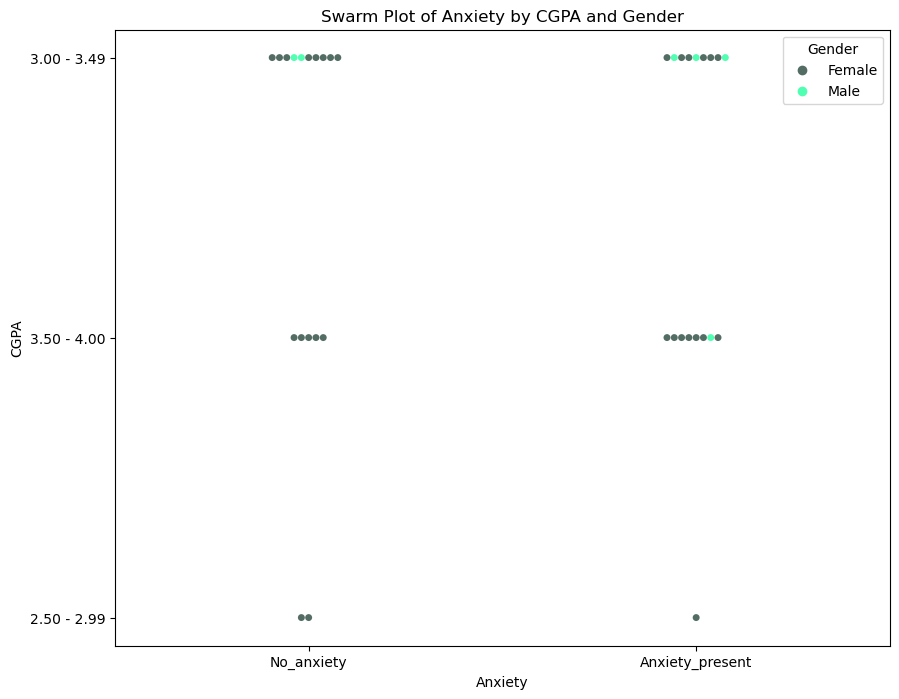

More female students with CGPA of 3.00 to 3.49 with no anxiety have depression compared to female students with anxiety. While female students with anxiety and CGPA of 3.50 to 4.00 are more likely to have depression relative to female students without anxiety and the same CGPA. Overall, there are variations in depression among female students according to their CGPA. Female students with a high CGPA tend to be more anxious, which can lead to depression. Further analysis is needed to prove the relationship between these variables.


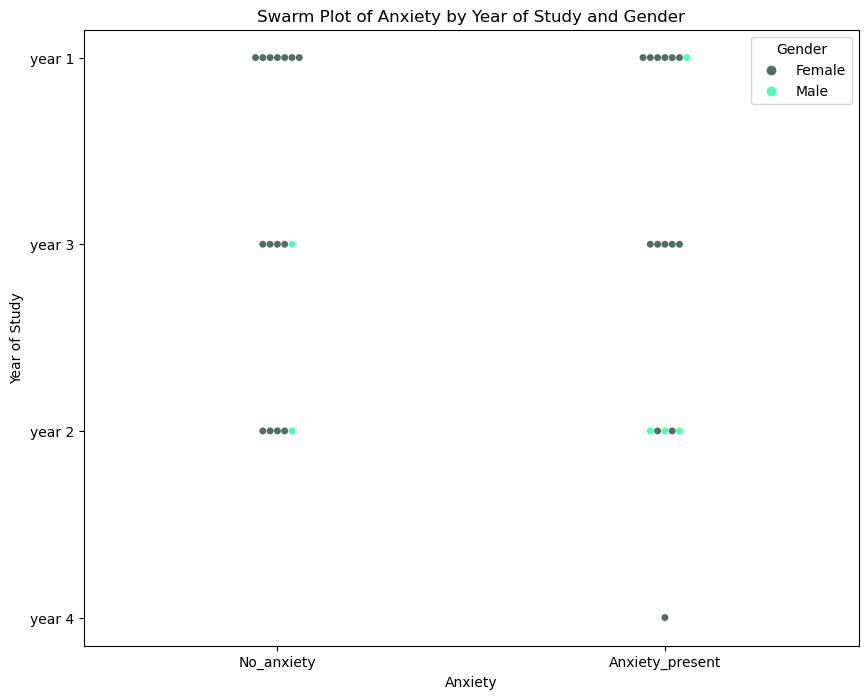

More female students in year 1 with no anxiety have depression compared to female students with anxiety in the same year. For year 2, more female students with no anxiety have depression. In year 3, more female students with anxiety have depression. Overall, there are variations in depression across gender, anxiety, and the year of study.


In [56]:
from anxiety_Analysis import AnxietyAnalysis

# Assuming depression_df is already defined in your notebook
anxiety_analysis = AnxietyAnalysis(depression_df)

# Plot anxiety by course and gender
anxiety_analysis.plot_anxiety_by_course_and_gender()

# Print insight about anxiety, gender, and course
print(anxiety_analysis.anxiety_gender_course_insight())

# Plot anxiety by CGPA and gender
anxiety_analysis.plot_anxiety_by_cgpa_and_gender()

# Print the insight about anxiety, CGPA, and gender
print(anxiety_analysis.anxiety_cgpa_gender_insight())

# Plot anxiety by year of study and gender
anxiety_analysis.plot_anxiety_by_year_and_gender()

# Print the insight about anxiety, year of study, and gender
print(anxiety_analysis.anxiety_year_gender_insight())

In [57]:
# Check the structure of cdata to confirm it is ready for correlation
print(cdata.info())

# Preview the first few rows
cdata.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             101 non-null    object
 1   Gender                101 non-null    object
 2   Age                   101 non-null    int32 
 3   Course                101 non-null    object
 4   Year of Study         101 non-null    object
 5   CGPA                  101 non-null    object
 6   Marital status        101 non-null    object
 7   Depression            101 non-null    object
 8   Anxiety               101 non-null    object
 9   Panic attack          101 non-null    object
 10  Treatment             101 non-null    object
 11  Depressed             101 non-null    bool  
 12  Anxiety_present       101 non-null    bool  
 13  Panic_attack_present  101 non-null    bool  
dtypes: bool(3), int32(1), object(10)
memory usage: 8.7+ KB
None


,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment,Depressed,Anxiety_present,Panic_attack_present
0,08/07/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment,True,False,True
1,08/07/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment,False,True,False
2,08/07/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment,True,True,True
3,08/07/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment,True,False,False
4,08/07/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment,False,False,False


In [58]:
# Convert categorical columns to numeric using pd.get_dummies
cdata_numeric = pd.get_dummies(cdata, drop_first=True)

# Alternatively, for specific columns, you can use manual mapping
# Mapping example for `Depression` column
cdata['Depression'] = cdata['Depression'].replace({'Depressed': 1, 'Not depressed': 0})
cdata['Anxiety'] = cdata['Anxiety'].replace({'Anxiety_present': 1, 'No_anxiety': 0})
cdata['Panic attack'] = cdata['Panic attack'].replace({'Panic attack': 1, 'No panic_attack': 0})

cdata['Course'] = cdata['Course'].astype('category').cat.codes
cdata['Year of Study'] = cdata['Year of Study'].replace({'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4})
cdata['Marital status'] = cdata['Marital status'].replace({'Not_married': 0, 'Married': 1})
cdata['Treatment'] = cdata['Treatment'].replace({'No_treatment': 0, 'Treatment': 1})

# Map `Gender` column to 0 and 1
cdata['Gender'] = cdata['Gender'].replace({'Male': 0, 'Female': 1})

# Convert `CGPA` to numeric values
cdata['CGPA'] = cdata['CGPA'].replace({
    '3.00 - 3.49': 3.25,
    '2.50 - 2.99': 2.75,
    '2.00 - 2.49': 2.25,
    '3.50 - 4.00': 3.75,
    '0 - 1.99': 1,
    '0.00 - 0.99': 0.50,
})

# Drop non-numeric columns that are not relevant for correlation
cdata_numeric = cdata.drop(columns=['Timestamp','Anxiety_present', 'Panic_attack_present', 'Depressed'])

# Check the data types
print(cdata_numeric.dtypes)

Gender              int64
Age                 int32
Course               int8
Year of Study       int64
CGPA              float64
Marital status      int64
Depression          int64
Anxiety             int64
Panic attack        int64
Treatment           int64
dtype: object


In [59]:
# Identify if there are any missing values in the DataFrame
print(cdata.isna().sum())

Timestamp               0
Gender                  0
Age                     0
Course                  0
Year of Study           0
CGPA                    0
Marital status          0
Depression              0
Anxiety                 0
Panic attack            0
Treatment               0
Depressed               0
Anxiety_present         0
Panic_attack_present    0
dtype: int64


In [60]:
cdata

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment,Depressed,Anxiety_present,Panic_attack_present
0,08/07/2020 12:02,1,18,14,1,3.25,0,1,0,1,0,True,False,True
1,08/07/2020 12:04,0,21,20,2,3.25,0,0,1,0,0,False,True,False
2,08/07/2020 12:05,0,19,18,1,3.25,0,1,1,1,0,True,True,True
3,08/07/2020 12:06,1,22,24,3,3.25,1,1,0,0,0,True,False,False
4,08/07/2020 12:13,0,23,28,4,3.25,0,0,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56,1,21,2,1,3.75,0,0,1,0,0,False,True,False
97,13/07/2020 21:21,0,18,14,2,3.25,0,1,1,0,0,True,True,False
98,13/07/2020 21:22,1,19,29,3,3.75,1,1,0,1,0,True,False,True
99,13/07/2020 21:23,1,23,30,4,3.75,0,0,0,0,0,False,False,False


In [61]:
# Calculate the correlation matrix
correlation_matrix = cdata_numeric.corr()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv', index=True)

# Display the correlation matrix
correlation_matrix

,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
Gender,1.000000,0.012677,0.022539,0.073861,0.149438,0.069389,0.143235,-0.059783,0.023902,0.052168
Age,0.012677,1.000000,-0.075808,0.248681,0.029865,0.106911,-0.067390,-0.088890,0.059763,0.049241
Course,0.022539,-0.075808,1.000000,0.140195,0.053149,0.141879,0.139332,0.101036,0.096021,-0.083201
Year of Study,0.073861,0.248681,0.140195,1.000000,0.014245,0.232232,-0.020192,-0.020962,-0.021754,-0.077108
CGPA,0.149438,0.029865,0.053149,0.014245,1.000000,0.035372,0.042574,0.173095,0.042026,0.024998
Marital status,0.069389,0.106911,0.141879,0.232232,0.035372,1.000000,0.595784,0.092606,0.275909,0.349819
Depression,0.143235,-0.067390,0.139332,-0.020192,0.042574,0.595784,1.000000,0.273764,0.246842,0.345105
Anxiety,-0.059783,-0.088890,0.101036,-0.020962,0.173095,0.092606,0.273764,1.000000,0.084478,0.086880
Panic attack,0.023902,0.059763,0.096021,-0.021754,0.042026,0.275909,0.246842,0.084478,1.000000,0.182145
Treatment,0.052168,0.049241,-0.083201,-0.077108,0.024998,0.349819,0.345105,0.086880,0.182145,1.000000


# Correlation Analysis Findings
**Here are the key findings from the correlation matrix:**

Depression vs. CGPA:<br>
The correlation between CGPA and depression is weak positive correlation (0.04), suggesting that students with higher CGPA might have a slightly higher likelihood of experiencing depression, though this relationship is weak.

Anxiety vs. CGPA:<br>
There is a weak positive correlation (0.17) between CGPA and anxiety, indicating that students with higher CGPA might have a slightly higher likelihood of experiencing anxiety, though this is not a strong relationship.

Panic Attack vs. CGPA:<br>
The correlation between CGPA and panic attacks is almost neutral (0.04), indicating no significant relationship.

Age vs. Mental Health Conditions:<br>
Age shows minimal correlations with depression (-0.07), anxiety (-0.09), and panic attacks (0.06), indicating that age is not a strong factor in these conditions within this dataset.

**Gender:** <br>
1. Gender and CGPA: <br>
0.149438 (Weak positive correlation)<br>
Indicates that there is a slight positive relationship between gender and CGPA, but it's weak.

2. Gender and Depression: <br>
0.143235 (Weak positive correlation)<br>
Suggests a weak positive relationship between gender and depression levels.


**Age:** <br>
1. Age and Year of Study:<br>
0.248681 (Weak positive correlation)<br>
Indicates that as age increases, students tend to be in higher years of study.

2. Age and Depression:<br>
-0.067390 (Weak negative correlation)<br>
Suggests that older students are slightly less likely to report depression, but the relationship is weak.

3. Age and Marital Status:<br>
0.106911 (Weak positive correlation)<br>
Shows a weak positive correlation, indicating that older students might be more likely to be married.

**Depression:** <br>
1. Depression and Marital Status:<br>
0.595784 (Moderate to strong positive correlation)<br>
This shows a strong relationship, indicating that marital status is closely related to depression. Married students might be more likely to report depression.

2. Depression and Treatment:<br>
0.345105 (Moderate positive correlation)<br>
Suggests that students reporting depression are more likely to be receiving treatment.

3. Depression and Anxiety:<br>
0.273764 (Weak to moderate positive correlation)<br>
Indicates that students with depression are more likely to experience anxiety as well.

**Marital Status:** <br>
1. Marital Status and Treatment:<br>
0.349819 (Moderate positive correlation)<br>
Married students might be more likely to receive treatment.

2. Marital Status and Panic Attack:<br>
0.275909 (Weak to moderate positive correlation)<br>
Suggests a slight relationship between marital status and experiencing panic attacks.

**Relationships Among Conditions:** <br>
- Depression is somewhat correlated with anxiety (0.27) and panic attacks (0.25), suggesting that students experiencing one condition are more likely to experience the others as well.
- Seeking specialist treatment is more strongly correlated with depression (0.35) than with anxiety (0.09) or panic attacks (0.18).

**Conclusion of Correlation analysis**

- The analysis reveals several weak to moderate correlations between variables, with some interesting relationships, particularly between marital status and depression, as well as between depression and treatment.

- The CGPA of students does not strongly correlate with their mental health conditions. While there is a slight tendency for higher CGPA to correlate with lower depression and higher anxiety, these relationships are weak and should be interpreted with caution.

- Mental health conditions like depression, anxiety, and panic attacks tend to co-occur, indicating a need for holistic mental health support.

- Most correlations are weak, indicating that the variables may not be strongly related to each other. This suggests that other factors might be influencing student mental health and academic performance.

# CONCLUSION

In conclusion, the analysis reveals a nuanced understanding of the mental health challenges faced by students across different age groups and genders. Between ages 20-22, there appears to be a notable stability with fewer reported mental health issues, while ages 18-19 and 23+ exhibit higher levels of concern and challenges. Particularly, younger students (18-19) struggle with the pressure of meeting academic requirements amidst adjusting to a new environment, possibly contributing to heightened levels of depression during these early years.

Moreover, our examination of gender differences highlights that female students tend to experience higher levels of depression across various metrics including anxiety levels, CGPA, and panic attacks compared to their male counterparts.

In Conclusion, it is evident that mental health concerns affect students irrespective of their course of study, year of study, gender, or marital status. The findings underscore the need for targeted support and interventions to address the multifaceted mental health needs of students throughout their academic journey.


# RECOMMENDATION

The provision of mental health facilities tailored to meet the needs of students, especially during the early and final years of their studies, is imperative for mitigating the prevalence of depression on campuses. Adequate support during these critical periods can significantly contribute to the overall well-being and academic success of students.

Furthermore, it is important to ensure a more balanced distribution of dataset inclusion between male and female students to draw more comprehensive and accurate conclusions regarding mental health trends and disparities. 

Additionally, conducting further analysis to explore the relationships between various variables is crucial for gaining deeper insights into the factors that influence depression among students. By examining correlations. 

finally, prioritizing mental health resources, promoting gender-inclusive data collection, and conducting comprehensive analyses are essential steps toward fostering a culture of mental wellness and resilience within educational institutions. 




